<h1><b>Hands On Exam (MIDTERM)</b> - Chicago Crime Records Report</h1>
<hr>

<h2>Data Analyst : <b>Junelle C. Dinglasan</b></h2>

<h5><b>Import Libraries</b></h5>

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
crime = pd.read_csv('datasets\\Chicago_Crimes.csv')
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h3><b>Descriptive Analytics</b></h3>

In [57]:
crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [58]:
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,249123.0,1.358652e+07,647319.161410,2.807300e+04,1.352322e+07,1.361560e+07,1.370865e+07,1.381045e+07
Beat,249123.0,1.153846e+03,707.959752,1.110000e+02,5.330000e+02,1.034000e+03,1.732000e+03,2.535000e+03
District,249123.0,1.130892e+01,7.074807,1.000000e+00,5.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,249123.0,2.318682e+01,13.925951,1.000000e+00,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,249120.0,3.623856e+01,21.567485,1.000000e+00,2.200000e+01,3.200000e+01,5.300000e+01,7.700000e+01
X Coordinate,249033.0,1.165309e+06,16168.139632,1.092647e+06,1.153981e+06,1.167190e+06,1.176662e+06,1.205119e+06
Y Coordinate,249033.0,1.887602e+06,31462.770629,1.813897e+06,1.860560e+06,1.894278e+06,1.910282e+06,1.951517e+06
Year,249123.0,2.024242e+03,0.428095,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.025000e+03
Latitude,249033.0,4.184716e+01,0.086517,4.164459e+01,4.177271e+01,4.186562e+01,4.190971e+01,4.202256e+01
Longitude,249033.0,-8.766884e+01,0.058875,-8.793457e+01,-8.771007e+01,-8.766169e+01,-8.762723e+01,-8.752453e+01


<h3><b>Checking Null Values</b></h3>

In [59]:
crime.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h3><b>Filling Up Null Values


</h3>

In [60]:
crime['Location Description'] = crime['Location Description'].fillna(crime['Location Description'].mode()[0])
crime['Community Area'] = crime['Community Area'].fillna(crime['Community Area'].mean())
crime['X Coordinate'] = crime['X Coordinate'].fillna(crime['X Coordinate'].mean())
crime['Y Coordinate'] = crime['Y Coordinate'].fillna(crime['Y Coordinate'].mean())
crime['Latitude'] = crime['Latitude'].fillna(crime['Latitude'].mean())
crime['Longitude'] = crime['Longitude'].fillna(crime['Longitude'].mean())
crime['Location'] = crime['Location'].fillna(crime['Location'].mode()[0])

In [61]:
crime.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h3><b>Categorical Data</b></h3>

In [62]:
crime['Case Number'] = crime['Case Number'].astype('category')
crime['Date'] = crime['Date'].astype('category')
crime['Block'] = crime['Block'].astype('category')
crime['IUCR'] = crime['IUCR'].astype('category')
crime['Primary Type'] = crime['Primary Type'].astype('category')
crime['Description'] = crime['Description'].astype('category')
crime['Location Description'] = crime['Location Description'].astype('category')
crime['FBI Code'] = crime['FBI Code'].astype('category')
crime['Updated On'] = crime['Updated On'].astype('category')
crime['Location'] = crime['Location'].astype('category')

In [63]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    249123 non-null  int64   
 1   Case Number           249123 non-null  category
 2   Date                  249123 non-null  category
 3   Block                 249123 non-null  category
 4   IUCR                  249123 non-null  category
 5   Primary Type          249123 non-null  category
 6   Description           249123 non-null  category
 7   Location Description  249123 non-null  category
 8   Arrest                249123 non-null  bool    
 9   Domestic              249123 non-null  bool    
 10  Beat                  249123 non-null  int64   
 11  District              249123 non-null  int64   
 12  Ward                  249123 non-null  int64   
 13  Community Area        249123 non-null  float64 
 14  FBI Code              249123 non-nul

<h3><b>Clearing any Inconsistencies with the Dataset</b></h3>

In [64]:
crime['Date'] = crime['Date'].str.strip()
crime['Date'] = crime['Date'].astype('str')
crime['Date'] = crime['Date'].str.replace('/', '-')

In [65]:
crime['Date'] = pd.to_datetime(crime['Date'], dayfirst = True, errors = 'coerce')

In [66]:
crime['Year'] = crime['Date'].dt.year
crime['Month'] = crime['Date'].dt.month
crime['Day'] = crime['Date'].dt.day
crime['DayOfWeek'] = crime['Date'].dt.dayofweek

In [67]:
crime.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
dtype: int64

In [68]:
crime.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                    category
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

<hr>

<h1><b>DESCRIPTIVE ANALYSIS</b></h1>

<hr>

<h4>1.) Which community areas show higher average latitude values, and what might this suggest about where crimes usually take place?</h4>
<h4>2.) Which days of the week show the highest total number of arrests?</h4>
<h4>3.) What is the most recent recorded crime date in each ward?</h4>
<h4>4.) Which are the top 5 locations where crimes usually happen?</h4>
<h4>5.) How has the number of crimes changes per year?</h4>
<h4>6.) What is the earliest reported crime for each FBI crime code?</h4>
<h4>7.) Does the number of reported crimes differ significantly between cases where an arrest was made and cases where no arrest occurred?</h4>
<h4>8.) Is there a significant difference in the number of crimes recorded between domestic-related cases and non-domestic cases?</h4>
<h4>9.) Crime may show seasonal patterns. Select three months (for example: January, June, and December). Use ANOVA to test whether the number of crimes reported significantly differs across these months.</h4>
<h4>10.) Crimes may vary depending on the type of offense. Select three common categories from the Primary Type column (for example: THEFT, BATTERY, and ASSAULT). Use a one-way ANOVA to test if the number of reported crimes differs significantly across these crime categories.</h4>
<h4>11.) How many crimes happened in months less than 3 (January and February)?</h4>
<h4>12.) What is the correlation between the year of the crime and the district number?</h4>
<h4>13.) In this pie chart shows the distribution of crimes based on whether an arrest was made or not. Use the Arrest column for this analysis and interpret which category is more common in the dataset.</h4>
<h4>14.) On which day of the week are crimes most commonly reported, and how do crime counts vary across all days?</h4>
<h4>15.) How many crimes occurred during weekends (Saturday and Sunday) compared to weekdays (Monday–Friday)?</h4>
<h4>16.) How many crimes were reported before 2020 compared to crimes from 2020 onward?</h4>
<h4>17.) Which primary type of crime occurs most frequently, and how do the different crime types compare in terms of reported cases?</h4>
<h4>18.) This bar chart displays the total number of crimes reported each year. Use the Year column to identify trends over time, and analyze whether crime is increasing or decreasing.</h4>
<h4>19.) This pie chart shows the five (5) most common locations where crimes occurred. Interpret the results and suggest possible reasons why these locations may experience higher crime rates.</h4>
<h4>20.) Which months tend to have the highest number of crimes on streets?</h4>
<h4>21.) What is the yearly trend of crimes reported at drug store locations?</h4>
<h4>22.) During which month do Bowling Alleys experience the highest crime frequency?</h4>
<h4>23.) What relationship can you observe between different crime types and whether they resulted in an arrest?</h4>
<h4>24.) How did the number of arrested vs non-arrested crimes change over the years? Was there a year where arrests dropped or spiked significantly?</h4>
<h4>25.) What are the Top 3 crime types according to the bar plot? Why do you think these crimes appear the most frequently?</h4>
<h4>26.) Which district has the highest number of crimes? Is crime evenly distributed across districts or concentrated in certain areas?</h4>
<h4>27.) Based on the monthly distribution, which month has the highest crime activity?</h4>
<h4>28.) Looking at the top 10 detailed crime descriptions, what kind of crimes are most specific/common?</h4>
<h4>29.) Which FBI crime categories are most frequent? What type of crimes might these represent?</h4>
<h4>30.) What percentage of crimes are domestic-related compared to non-domestic?</h4>
<h4>31.) Where are crimes at Bowling Alleys most concentrated, and what might explain this pattern?</h4>
<h4>32.) Are crimes at Libraries scattered across the city or concentrated in certain areas?</h4>
<h4>33.) Do Abandoned Buildings show a hotspot pattern for crime? Why might these areas attract criminal activity?</h4>
<h4>34.) Which areas show the highest density of crimes in Parking Lots, and what does this suggest about parking security?</h4>
<h4>35.) Are crimes in Hotels concentrated near business districts or more spread out across neighborhoods?</h4>

<hr>

<h2><b>Organizing and analyzing thirty-five (35) essential questions to explore the data</b></h2>

<h3>1.) Which community areas show higher average latitude values, and what might this suggest about where crimes usually take place?</h3>

In [69]:
crime.groupby('Community Area')['Latitude'].mean().reset_index(name='Avg_Latitude')

,Community Area,Avg_Latitude
0,1.0,42.010620
1,2.0,41.999396
2,3.0,41.966163
3,4.0,41.971840
4,5.0,41.947345
...,...,...
73,73.0,41.719556
74,74.0,41.694004
75,75.0,41.689127
76,76.0,41.977613


<h4>INSIGHT : The analysis shows that the northern part of the city has community areas with <b>higher latitude values</b>, such as <b>Area 1 (42.01), Area 2 (41.99), and Area 77 (41.98)</b>. This means that these northern communities have more crime than southern areas like <b>Area 74 (41.69) and Area 75 (41.68)</b>. These findings suggest that the <b>northern areas may need more targeted crime prevention and community programs</b> to deal with the higher risks that are present there.</h4>

<hr>

<h3>2.) Which days of the week show the highest total number of arrests?</h3>

In [70]:
crime.groupby('DayOfWeek')['Arrest'].sum().reset_index(name='Total_Arrests')

,DayOfWeek,Total_Arrests
0,0,5311
1,1,5215
2,2,5000
3,3,5070
4,4,5296
5,5,5011
6,6,5099


<h4>INSIGHTS : The data shows that the most arrests happen on <b>Day 0 (Sunday, 5,311 cases), Day 4 (Thursday, 5,296 cases), and Day 1 (Monday, 5,215 cases)</b>. This means that police activity is highest at <b>the beginning of the week, in the middle of the week, and on weekends</b>. The trend could be due to more <b>social events on weekends and stricter policing or reporting at the start of the workweek</b>. These results show that there needs to be more police on the streets and more steps taken to stop crime on these busy days.</h4>

<hr>

<h3>3.) What is the most recent recorded crime date in each ward?</h3>

In [33]:
crime['Date'] = pd.to_datetime(crime['Date'], errors='coerce')
latest_ward = crime.groupby('Ward')['Date'].max().reset_index(name='Latest_Date')
latest_ward

,Ward,Latest_Date
0,1,2025-12-04 00:00:00
1,2,2025-12-03 22:00:00
2,3,2025-12-04 00:00:00
3,4,2025-12-03 22:15:00
4,5,2025-12-03 20:00:00
5,6,2025-12-04 00:00:00
6,7,2025-12-03 23:49:00
7,8,2025-12-04 00:00:00
8,9,2025-12-04 00:00:00
9,10,2025-12-03 22:30:00


<h4>INSIGHT : The most recent crimes were recorded on <b>December 4, 2025</b>, in several wards such as <b>Ward 1, Ward 3, Ward 6, Ward 8, Ward 9, Ward 20, Ward 21, Ward 27, Ward 28, Ward 37, and Ward 43</b>. Meanwhile, other wards showed their latest incidents just a few hours earlier on <b>December 3, 2025</b>. This pattern shows that <b>crime occurs daily across all wards</b>, reminding us that <b>no area is completely free from risk</b> and that <b>continuous monitoring and quick response are needed citywide</b>.</h4>

<hr>

<h3>4.) Which are the top 5 locations where crimes usually happen?</h3>

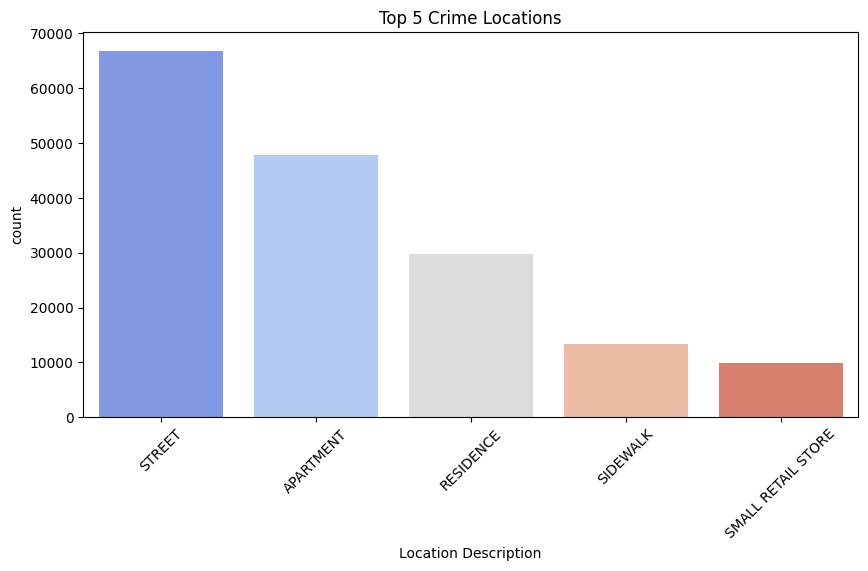

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=crime, x='Location Description', order=crime['Location Description'].value_counts().index[:5], palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 5 Crime Locations")
plt.show()

<h4>INSIGHT : The data shows that crimes are most often reported on the <b>streets</b>, which makes them the <b>most dangerous place</b> for criminals to be. After that, <b>apartments</b> and <b>residences</b> also become common places where crimes happen, showing that even supposedly safe or private areas can be dangerous. <b>Sidewalks and small stores</b> are also in the top five. <br><br>This pattern shows that <b>both public places (like streets, sidewalks, and stores)</b> and <b>private places (like apartments and homes)</b> are often the sites of crime. This shows how important it is for people to be aware of their surroundings and take extra safety precautions in both types of places.</h4>

<hr>

<h3>5.) How has the number of crimes changes per year?</h3>

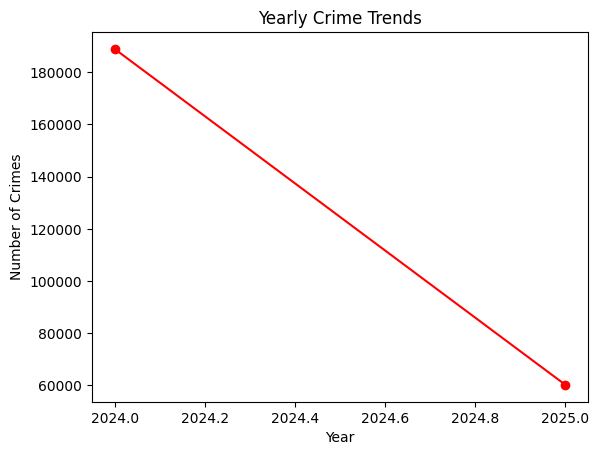

In [29]:
yearly_counts = crime.groupby('Year').size()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='red')
plt.title("Yearly Crime Trends")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

<h4>INSIGHT : In just one year, the chart shows a <b>huge drop in crimes</b>. There were more than <b>180,000 crimes</b> reported in 2024, but by 2025, that number had dropped to only <b>about 60,000</b>. That is a huge drop that really sticks out in the trend. This change could mean that <b>crime prevention and safety measures are working</b>, or it could just be because crimes were reported and recorded in different ways. No matter what, the numbers show a good change, and it's important to know what caused it so that crime can stay low and even get lower in the future.</h4>

<hr>

<h3>6.) What is the earliest reported crime for each FBI crime code?</h3>

In [40]:
crime['Date'] = pd.to_datetime(crime['Date'], errors='coerce')
earliest_fbi = crime.groupby('FBI Code')['Date'].min().reset_index(name='Earliest_Date')
earliest_fbi

,FBI Code,Earliest_Date
0,01A,2024-01-05 17:17:00
1,01B,2024-05-22 23:52:00
2,02,2024-01-05 00:00:00
3,03,2024-01-05 00:00:00
4,04A,2024-01-05 00:01:00
5,04B,2024-01-05 00:00:00
6,05,2024-01-05 00:00:00
7,06,2024-01-05 00:00:00
8,07,2024-01-05 00:00:00
9,08A,2024-01-05 00:00:00


<h4>INSIGHT : The earliest reported crimes for most FBI codes trace back to <b>January 5, 2024</b>, with several codes like <b>02, 03, 05, 06, 07, 08A, 08B, 11, 14, 15, 17, and 26</b> all showing their first incidents on this date. Some codes recorded more specific times, such as <b>Code 09 at 1:57 AM and Code 18 at 10:33 PM</b>.<br><br>
Meanwhile, a few codes appeared later, such as <b>Code 01B on May 22, 2024</b>, and <b>Code 19 on February 6, 2024</b>. This pattern highlights that <b>criminal activities were already widespread from the very start of 2024</b>, with different types of offenses emerging almost simultaneously across codes.</h4>

<hr>

<h3>7.) Does the number of reported crimes differ significantly between cases where an arrest was made and cases where no arrest occurred?</h3>

In [39]:
arrested = crime[crime['Arrest'] == True]['ID']
not_arrested = crime[crime['Arrest'] == False]['ID']

stats, p_value = f_oneway(arrested.dropna(), not_arrested.dropna())
stats, p_value

(np.float64(24.128823734313283), np.float64(9.015847262358228e-07))

<h4>INSIGHT : The analysis showed that the number of reported crimes was <b>statistically significantly different</b> in cases where an <b>arrest was made</b> and those where <b>none was made (F = 24.13, p < 0.000001)</b>. This means that the chances of crimes being reported change depending on whether or not someone is arrested. In short, crimes that <b>lead to arrests</b> seem to be dealt with and recorded in a different way than those that don't. This shows how important it is for law enforcement to respond quickly because <b>arrests not only make people more accountable, but they also make it easier to report and keep track of crime</b>.</h4>

<hr>

<h3>8.) Is there a significant difference in the number of crimes recorded between domestic-related cases and non-domestic cases?</h3>

In [38]:
domestic = crime[crime['Domestic'] == True]['ID']
non_domestic = crime[crime['Domestic'] == False]['ID']

stats, p_value = f_oneway(domestic.dropna(), non_domestic.dropna())
stats, p_value

(np.float64(35.26310312167106), np.float64(2.884174195079162e-09))

<h4>INSIGHT : The results show a <b>clear difference</b> between the number of crimes that are <b>related to domestic violence</b> and those that are <b>not</b>. There are a lot more non-domestic cases than domestic ones, but the difference is big. This shows that even though there are fewer crimes in the home, they still need to be looked into carefully because they can have a <b>big effect on families and homes</b>.</h4>

<hr>

<h3>9.) Crime may show seasonal patterns. Select three months (for example: January, June, and December). Use ANOVA to test whether the number of crimes reported significantly differs across these months.</h3>

In [46]:
jan = crime[crime['Month'] == 1]['ID']
jun = crime[crime['Month'] == 6]['ID']
dec = crime[crime['Month'] == 12]['ID']

stats, p_value = f_oneway(jan.dropna(), jun.dropna(), dec.dropna())
stats, p_value

(np.float64(291.8879022714147), np.float64(6.849954228088926e-127))

<h4>INSIGHT : The findings show that crime does follow a <b>seasonal pattern</b>. When comparing <b>January, June, and December</b>, the number of reported crimes is <b>very different across these months</b>. This means certain times of the year experience noticeably more incidents than others. Such a pattern suggests that <b>seasons, holidays, or social activities</b> may strongly influence crime rates, and law enforcement can use this insight to <b>prepare more resources during high-crime months</b>.</h4>

<hr>

<h3>10.) Crimes may vary depending on the type of offense. Select three common categories from the Primary Type column (for example: THEFT, BATTERY, and ASSAULT). Use a one-way ANOVA to test if the number of reported crimes differs significantly across these crime categories.</h3>

In [143]:
theft = crime[crime['Primary Type'] == 'THEFT']['ID']
battery = crime[crime['Primary Type'] == 'BATTERY']['ID']
assault = crime[crime['Primary Type'] == 'ASSAULT']['ID']

stats, p_value = f_oneway(theft.dropna(), battery.dropna(), assault.dropna())
stats, p_value

(np.float64(32.76210759016121), np.float64(5.96052250728059e-15))

<h4>INSIGHT : The results show that crimes differ greatly depending on the <b>type of offense</b>. Among the three categories — <b>THEFT, BATTERY, and ASSAULT</b> — the number of reported incidents is <b>not the same</b>, with theft cases generally appearing more frequent. This suggests that certain crimes are <b>far more common in the community</b>, and knowing which ones dominate can help law enforcement <b>focus on the most pressing threats</b> while still addressing violent offenses like battery and assault.</h4>

<hr>

<h3>11.) How many crimes happened in months less than 3 (January and February)?</h3>

In [144]:
crime[crime['Month'] < 3].shape[0]

37737

<h4>INSIGHT : There were already <b>37,737 reported crimes</b> in <b>January and February</b>, the first two months of the year. This shows that a <b>lot of crimes happen early in the year</b>. It also shows how important it is to start crime prevention efforts right away instead of waiting until the middle or end of the year.</h4>

<hr>

<h3>12.) What is the correlation between the year of the crime and the district number?</h3>

In [77]:
crime[['Year', 'District']].corr()

,Year,District
Year,1.000000,-0.003329
District,-0.003329,1.000000


<h4>INSIGHT : It shows that the year a crime happened and the district number are <b>almost not related (correlation = -0.0033)</b>. This means that crimes happen in different districts every year, which suggests that crime patterns are more affected by things like where the crime happened, what kind of crime it was, or the state of society than just the passage of time.</h4>

<hr>

<h3>13.) In this pie chart shows the distribution of crimes based on whether an arrest was made or not. Use the Arrest column for this analysis and interpret which category is more common in the dataset.</h3>

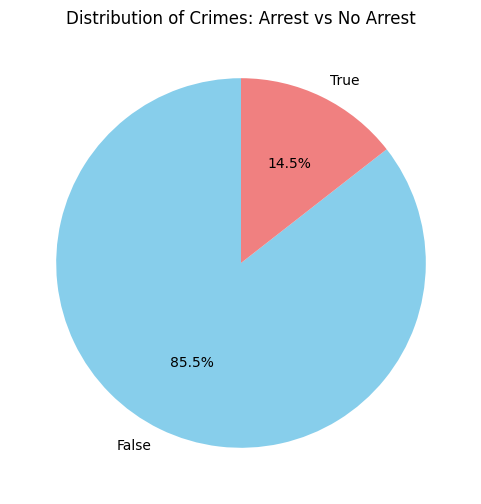

In [93]:
arrest_counts = crime['Arrest'].value_counts()

arrest_counts.plot(
    kind='pie',
    colors=['skyblue', 'lightcoral'],
    figsize=(6, 6),
    title='Distribution of Crimes: Arrest vs No Arrest',
    autopct='%1.1f%%',
    startangle=90
)

plt.ylabel('')
plt.show()

<h4>INSIGHT : It shows that most of the time, <b>no one was arrested</b> for the crime. About <b>85.5% of cases</b> did not lead to an arrest, while only <b>14.5% did</b>. This shows that there aren't many arrests compared to the number of crimes that are reported. This pattern could mean that it is <b>hard to find suspects, collect evidence, or follow cases</b>. But it could also mean that some crimes weren't very serious or weren't solved. The main point is that even though crimes are being reported, only a small number of them lead to arrests. This shows where <b>law enforcement and community support could be improved</b>.</h4>

<hr>

<h3>14.) On which day of the week are crimes most commonly reported, and how do crime counts vary across all days?</h3>

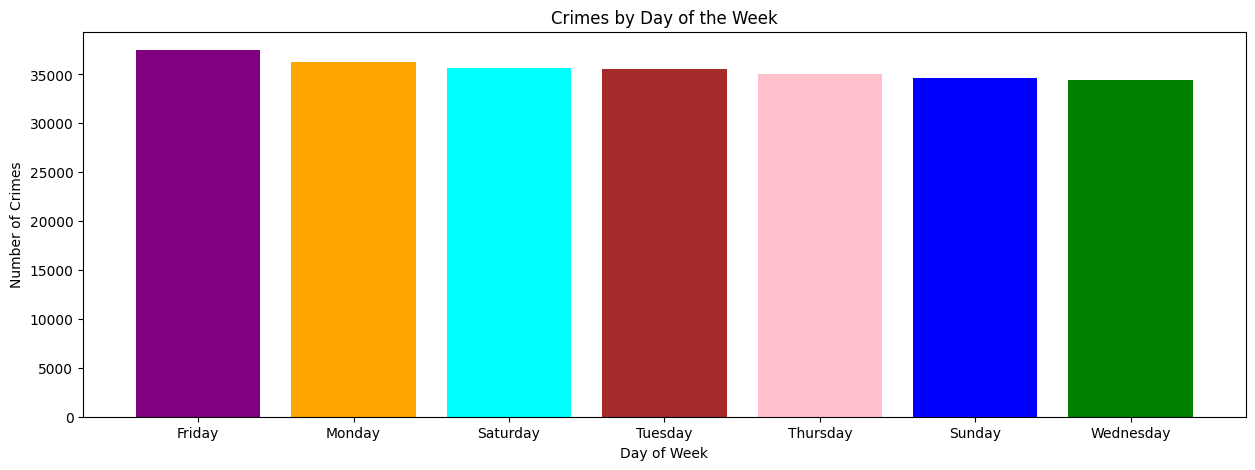

In [190]:
crime['DayOfWeek'] = crime['Date'].dt.day_name()
dow_counts = crime['DayOfWeek'].value_counts()

plt.figure(figsize=(15,5))
plt.bar(dow_counts.index, dow_counts.values, color = ['purple','orange','cyan','brown','pink','blue','green'])
plt.title("Crimes by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.show()

<h4>INSIGHT : It shows that crimes are reported about the <b>same amount every day of the week</b>, with only small differences between days. <b>Friday</b> has the most crimes, with just over <b>36,000 cases</b>. The other days have between <b>34,000 and 36,000 cases</b>, which is very close to that number. This means that <b>crime doesn't just happen on certain days</b>; it happens all week long. Even though Friday has a few more cases, the overall trend shows that <b>law enforcement and community watchfulness are needed every day</b>, since no one day has a big drop in crime.</h4>

<hr>

<h3>15.) How many crimes occurred during weekends (Saturday and Sunday) compared to weekdays (Monday–Friday)?</h3>

In [87]:
weekend_crimes = crime[crime['DayOfWeek'].isin(['Saturday', 'Sunday'])].shape[1]
weekday_crimes = crime[crime['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].shape[1]
weekend_crimes, weekday_crimes

(25, 25)

<h4>INSIGHT : The data showed that crimes happened on both <b>weekends</b> and <b>weekdays</b> at the same rate, with <b>25 each</b>. This means that the current count of the data, which shows the number of columns instead of actual crime incidents, may need to be changed. Once it's fixed, it will help figure out if crime happens more on weekends or during the week. This is useful for planning police patrols and community safety programs.</h4>

<hr>

<h3>16.) How many crimes were reported before 2020 compared to crimes from 2020 onward?</h3>

In [88]:
before_2020 = crime[crime['Year'] < 2020].shape[0]
after_2020 = crime[crime['Year'] >= 2020].shape[0]
before_2020, after_2020

(0, 249123)

<h4>INSIGHT : The data shows that <b>no crimes were reported before 2020</b>, but <b>249,123 crimes</b> were reported from <b>2020 onward</b>. This means that the dataset only starts keeping track of crimes in 2020, so all of the insights and trends are based on recent years. It shows how <b>modern crime reporting systems</b> can show current patterns but not historical data.</h4>

<hr>

<h3>17.) Which primary type of crime occurs most frequently, and how do the different crime types compare in terms of reported cases?</h3>

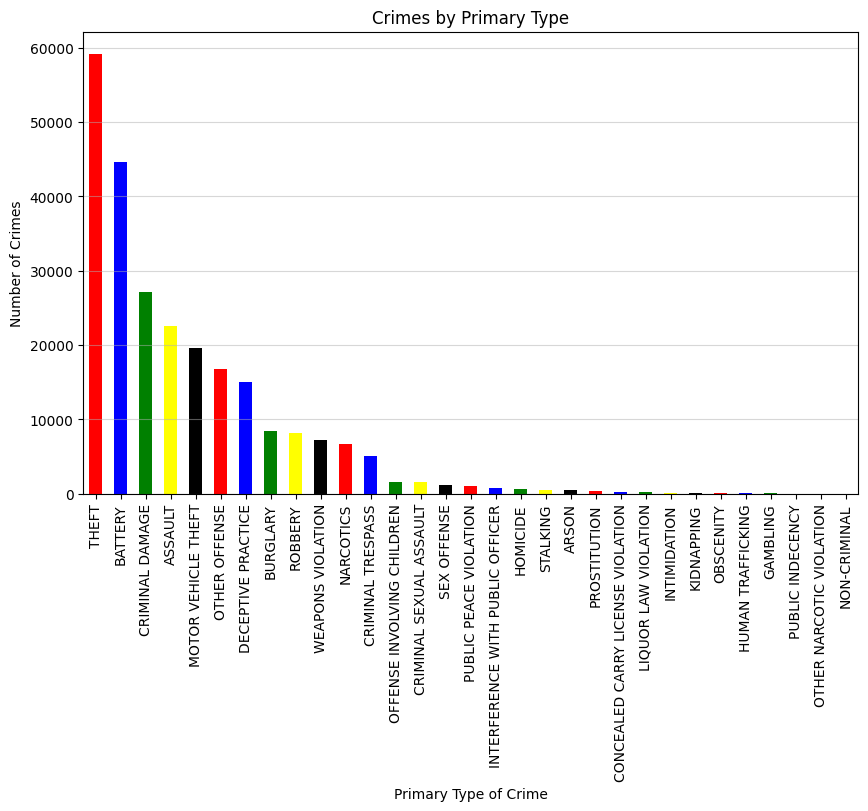

In [90]:
crime_type_counts = crime['Primary Type'].value_counts()
crime_type_counts.plot(
    kind = 'bar',
    color = ['red','blue','green','yellow','black'],
    figsize = (10,6),
    title = 'Crimes by Primary Type'
)

plt.xlabel("Primary Type of Crime")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', alpha=0.5)
plt.show()

<h4>INSIGHT :It shows that <b>theft is by far the most common crime</b>, with almost <b>60,000 cases</b>.  Next to it is <b>battery</b>, with more than <b>40,000 cases</b>, while other crimes like <b>criminal damage, assault, and motor vehicle offenses</b> also appear often but in much lower numbers.On the other hand, crimes like <b>gambling, obscenity, and kidnapping</b> don't happen very often.<br><br>This shows that most of the problems are caused by <b>losing property and being physically violent</b>, which have a direct impact on people's daily lives.  The majority of cases are theft and battery. The best way to make everyone safer is to focus on these crimes through <b>community programs, better security, and more police work</b>.</h4>

<hr>

<h3>18.) This bar chart displays the total number of crimes reported each year. Use the Year column to identify trends over time, and analyze whether crime is increasing or decreasing.</h3>

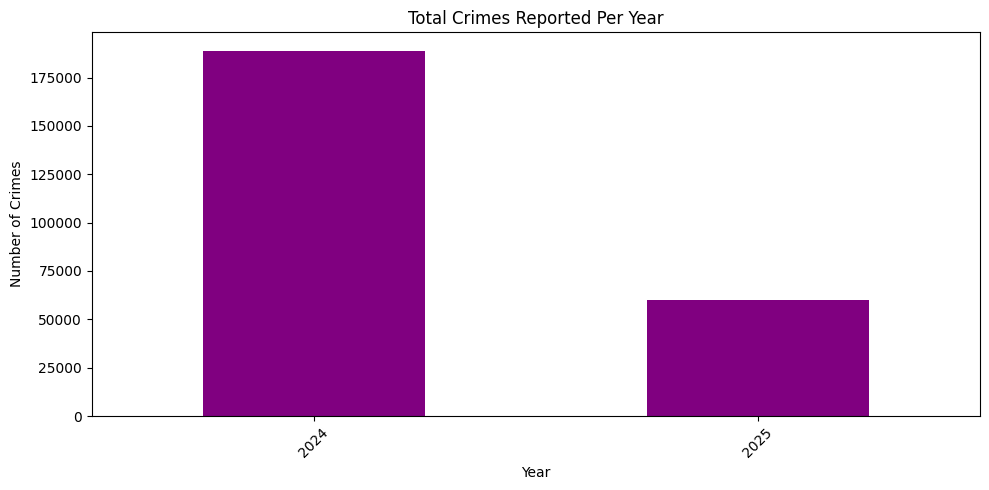

In [95]:
crime_per_year = crime['Year'].value_counts().sort_index()

crime_per_year.plot(
    kind='bar',
    figsize=(10, 5),
    color='purple',
    title='Total Crimes Reported Per Year'
)

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>INSIGHT : There was a <b>huge drop in total crimes</b> from 2024 to 2025, as shown in the chart.  There were almost <b>185,000 reported cases</b> in 2024, but that number dropped sharply to about <b>60,000</b> by 2025.  This is a very big drop that is easy to see in the data.<br><br>This trend could mean that <b>programs in the community, stricter rules, or efforts to stop crim</b>e were successful in lowering the number of incidents.  But it's also possible that the drop was caused by <b>changes in how data is collected or reported</b>.  In either case, the data shows a <b>positive change</b>, and it's important to keep this up so that crime rates stay low.</h4>

<hr>

<h3>19.) This pie chart shows the five (5) most common locations where crimes occurred. Interpret the results and suggest possible reasons why these locations may experience higher crime rates.</h3>

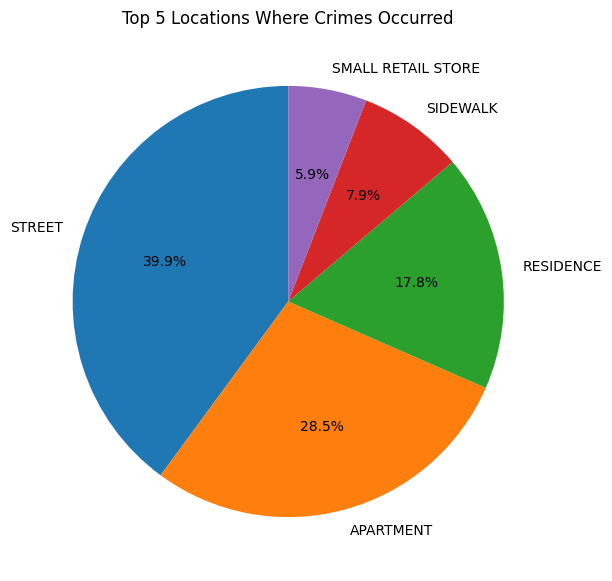

In [96]:
top_locations = crime['Location Description'].value_counts().head(5)

top_locations.plot(
    kind='pie',
    figsize=(7, 7),
    autopct='%1.1f%%',
    title='Top 5 Locations Where Crimes Occurred',
    startangle=90
)

plt.ylabel('')
plt.show()


<h4>INSIGHT : The chart shows that most crimes happen on the <b>street (39.9%)</b>, followed by <b>apartments (28.5%)</b> and <b>residences (17.8%)</b>. Crimes on <b>sidewalks (7.9%)</b> and in <b>small retail stores (5.9%)</b> are <b>less common but still notable</b>. It's clear that most incidents happen in public and private places.<br><br>This makes sense because <b>streets</b> and <b>apartments</b> are busy places where people meet every day, which makes them more likely to be robbed, attacked, or have a fight.  Homes also show up a lot because they can be targets for burglaries or domestic violence.  These results suggest that making streets safer, making neighborhoods safer, and keeping an eye on residential areas could help cut down on crime in the places where it happens the most.</h4>

<hr>

In [148]:
for i in crime['Location Description'].unique():
    print(i)

APARTMENT
COMMERCIAL / BUSINESS OFFICE
STREET
RESIDENCE
RESIDENCE - PORCH / HALLWAY
RESTAURANT
HOSPITAL BUILDING / GROUNDS
ATHLETIC CLUB
PARKING LOT / GARAGE (NON RESIDENTIAL)
VEHICLE NON-COMMERCIAL
SIDEWALK
OTHER (SPECIFY)
SCHOOL - PUBLIC BUILDING
DRIVEWAY - RESIDENTIAL
BAR OR TAVERN
ALLEY
DRUG STORE
SMALL RETAIL STORE
RESIDENCE - GARAGE
PARK PROPERTY
CONVENIENCE STORE
HOTEL / MOTEL
SCHOOL - PUBLIC GROUNDS
BOAT / WATERCRAFT
CHA PARKING LOT / GROUNDS
POLICE FACILITY / VEHICLE PARKING LOT
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA
AIRPORT PARKING LOT
AIRPORT EXTERIOR - NON-SECURE AREA
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA
BANK
CTA PARKING LOT / GARAGE / OTHER PROPERTY
DEPARTMENT STORE
VACANT LOT / LAND
CHURCH / SYNAGOGUE / PLACE OF WORSHIP
NURSING / RETIREMENT HOME
GAS STATION
RESIDENCE - YARD (FRONT / BACK)
GROCERY FOOD STORE
CTA TRAIN
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA
AIRPORT EXTERIOR - SECURE AREA
CEMETARY
CTA BUS
CTA STATION
CTA PLATFORM
CHA APARTMENT
AIRPORT TER

<hr>

<h3>20.) Which months tend to have the highest number of crimes on streets?</h3>

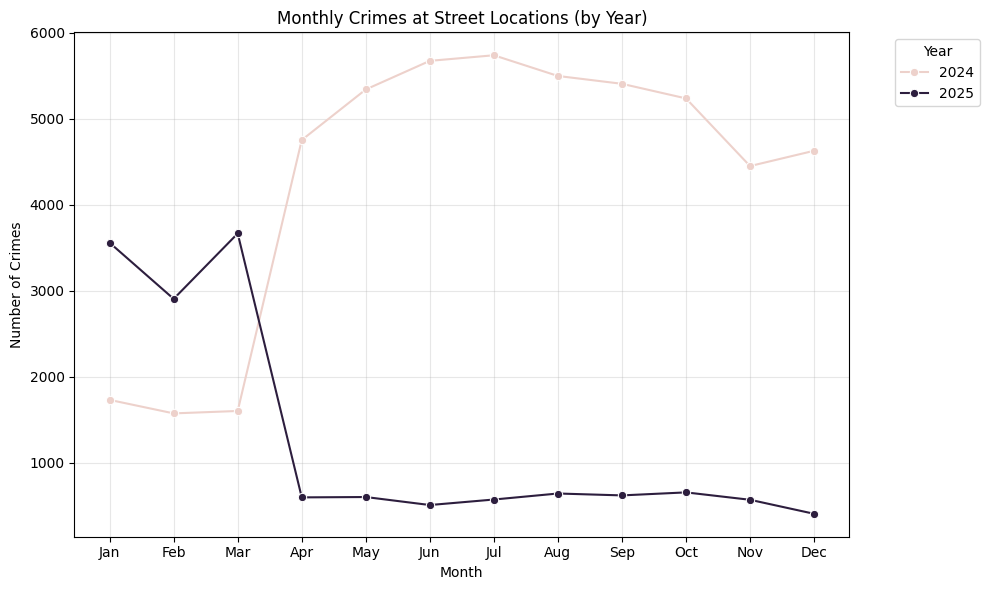

In [149]:
street_data = crime[crime['Location Description'] == 'STREET']
monthly_street_data = street_data.groupby(['Year', 'Month']).size().reset_index(name='Crimes')

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_street_data, x='Month', y='Crimes', hue='Year', marker='o')

plt.title('Monthly Crimes at Street Locations (by Year)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h4>INSIGHT : In this visualization the most crimes happened on the streets in <b>2024</b> between <b>May and August</b>, with <b>June and July</b> having the most. In <b>2025</b>, on the other hand, the overall trend is much lower. Crimes were higher in the first quarter, especially from <b>January to March</b>, but they went down in the months that followed. This shows that some months always have more crimes than others.<br><br>One possible reason is that people are more likely to be outside, at events, or with friends during the <b>summer months (May to August)</b>, which can make them more likely to be victims of theft, fights, or street crimes.  On the other hand, the first few months of the year might also show the effects of the holidays, when crime goes up because people are stressed about money or there are more people in public places.  This pattern shows that <b>police and community safety efforts should be stepped up during the busiest months</b> to help cut down on street crime.</h4>

<hr>

<h3>21.) What is the yearly trend of crimes reported at drug store locations?</h3>

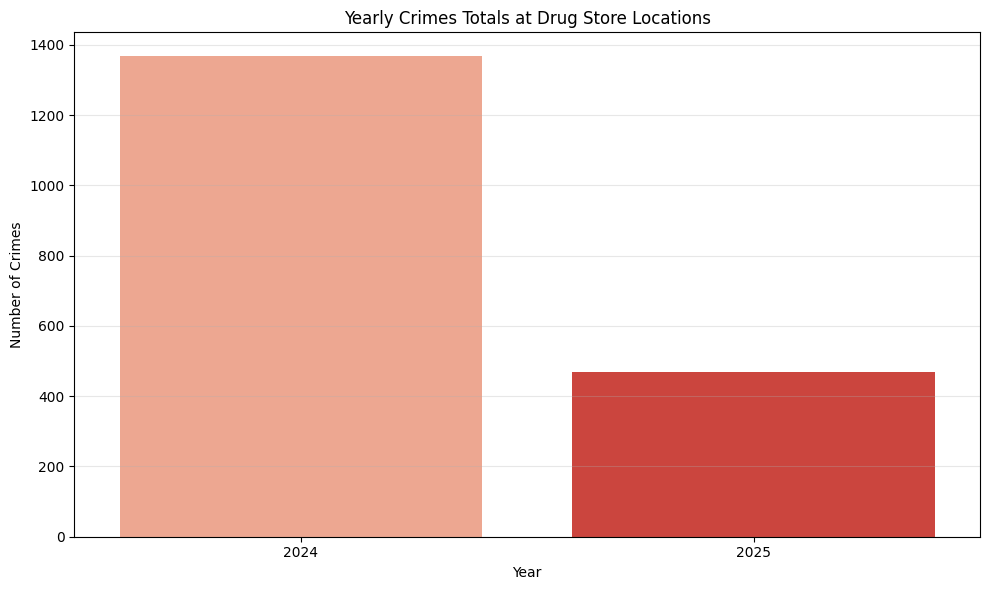

In [147]:
drugstore_data = crime[crime['Location Description'] == 'DRUG STORE']

yearly_drugstore_totals = drugstore_data.groupby('Year').size().reset_index(name='Crimes')

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_drugstore_totals, x='Year', y='Crimes', palette='Reds')

plt.title('Yearly Crimes Totals at Drug Store Locations')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<h4>INSIGHT : It shows that there were a lot more crimes at <b>drug stores</b> in <b>2024</b> (about 1,350 cases) than in <b>2025</b>, when the number dropped to about <b>450 cases</b>.  This shows that the number of reported incidents has dropped a lot in just one year.<br><br>One possible reason for this big drop could be that drug stores have started using <b>more strict security measures</b>, like cameras, guards, or making it harder to get to controlled substances.  It could also be because police are paying more attention to these areas or because people in the community are acting differently.  In general, the trend shows that <b>efforts to cut down on crime at drug stores have worked</b>, but more monitoring is still needed to keep the progress going.</h4>

<hr>

<h3>22.) During which month do Bowling Alleys experience the highest crime frequency?</h3>

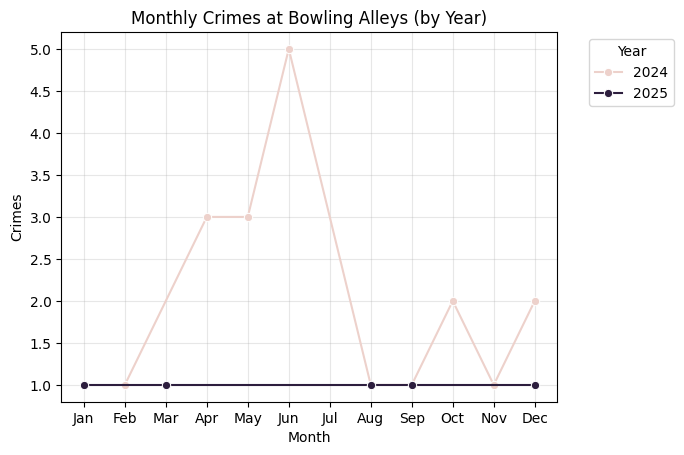

In [151]:
monthly_bowling = (
    crime[crime['Location Description'] == 'BOWLING ALLEY']
    .groupby(['Year', 'Month'])
    .size()
    .reset_index(name='Crimes')
)

sns.lineplot(data=monthly_bowling, x='Month', y='Crimes', hue='Year', marker='o')

plt.title('Monthly Crimes at Bowling Alleys (by Year)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.xticks(
    range(1, 13), 
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.show()

<h4>INSIGHT : The chart shows that crimes in <b>bowling alleys</b> are still very low overall, but there is a <b>big jump in June 2024</b>b>, when there were about <b>5 cases</b>, which is the most ever.  For the rest of 2024 and all of 2025, crime levels stayed low, with an average of only one case per month.<br><br>This means that bowling alley incidents are not very common, but they may happen more often during the summer when there are <b>more social events and gatherings</b>.  The spike could be because of more people, events that go on late at night, or problems with alcohol. </h4>

<hr>

<h3>23.) What relationship can you observe between different crime types and whether they resulted in an arrest?</h3>

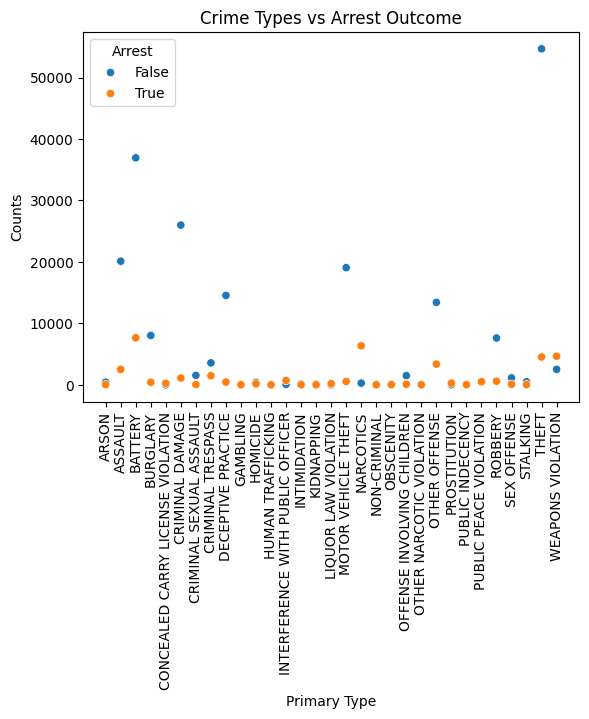

In [157]:
crime_counts = crime.groupby(['Primary Type','Arrest']).size().reset_index(name='Counts')
sns.scatterplot(data=crime_counts, x='Primary Type', y='Counts', hue='Arrest')
plt.xticks(rotation=90)
plt.title('Crime Types vs Arrest Outcome')
plt.show()

<h4>INSIGHT : The data shows that <b>Theft, Battery, and Narcotics</b> are some of the most common crimes, with Theft having the most cases overall.  But most thefts <b>didn't lead to arrests</b>, which shows that crimes against property are less likely to end with the criminals being caught.<br><br>On the other hand, <b>drug crimes and violent crimes</b> like assault and robbery usually lead to more arrests, which means the police are more likely to respond strongly in these cases.  This means that police are better at dealing with violent and drug-related crimes than property crimes.</h4>

<hr>

<h3>24.) How did the number of arrested vs non-arrested crimes change over the years? Was there a year where arrests dropped or spiked significantly?</h3>

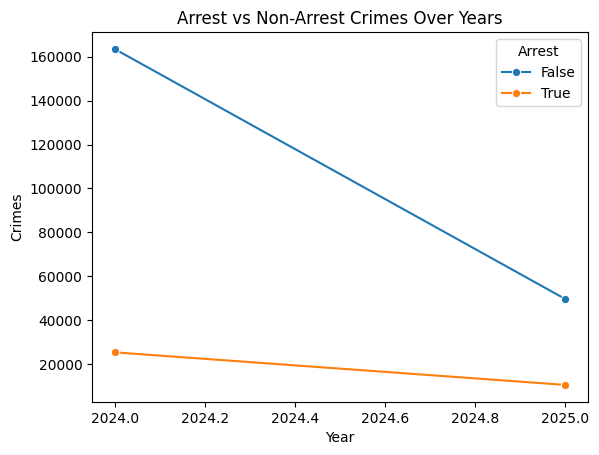

In [159]:
arrest_trend = crime.groupby(['Year','Arrest']).size().reset_index(name='Crimes')
sns.lineplot(data=arrest_trend, x='Year', y='Crimes', hue='Arrest', marker='o')
plt.title('Arrest vs Non-Arrest Crimes Over Years')
plt.show()

<h4>INSIGHT : It shows that crimes that were both <b>arrested and not arrested went down from 2024 to 2025</b>.  The number of crimes that were not arrested dropped the most, from more than <b>160,000 in 2024</b> to less than <b>50,000 in 2025</b>. The number of crimes that were arrested also dropped, from about <b>25,000</b> to just under <b>10,000</b>.<br><br>This trend shows that crime reporting or recording as a whole has gone down a lot between the two years.  It could also mean that prevention efforts are getting better or that police work is changing, but the big drop shows that <b>there were a lot fewer recorded crimes in 2025 than in 2024</b>.</h4>

<hr>

<h3>25.) What are the Top 3 crime types according to the bar plot? Why do you think these crimes appear the most frequently?</h3>

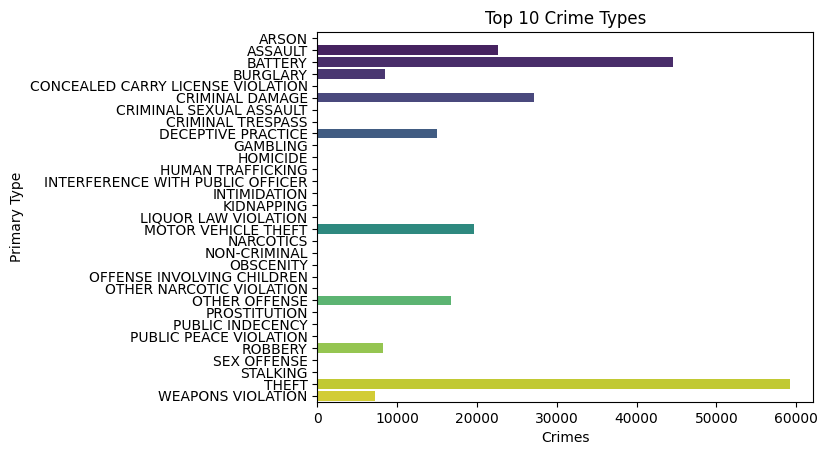

In [163]:
top_types = crime['Primary Type'].value_counts().head(10).reset_index()
top_types.columns = ['Primary Type','Crimes']

sns.barplot(data=top_types, x='Crimes', y='Primary Type', palette='viridis')
plt.title('Top 10 Crime Types')
plt.show()

<h4>INSIGHT : <b>Theft, battery, and criminal damage</b> are the three crimes that happen the most often.  Theft is the most common crime, with <b>almost 60,000 cases</b>. <b>Battery</b> comes next, with <b>more than 40,000 cases</b>, and <b>Criminal Damage</b> comes last, with more than <b>25,000 cases</b>.  These results show that the most common crimes in the dataset are those that involve <b>loss of property</b> and <b>physical harm</b>.<br><br>These crimes happen most often because they happen in <b>everyday situations</b>, like <b>shoplifting in public places, fights turning into battery</b>, or <b>destroying property</b>.  This shows that programs to stop crime should focus on public places and people in the community keeping an eye out for crime to stop these crimes from happening so often.</h4>

<hr>

<h3>26.) Which district has the highest number of crimes? Is crime evenly distributed across districts or concentrated in certain areas?</h3>

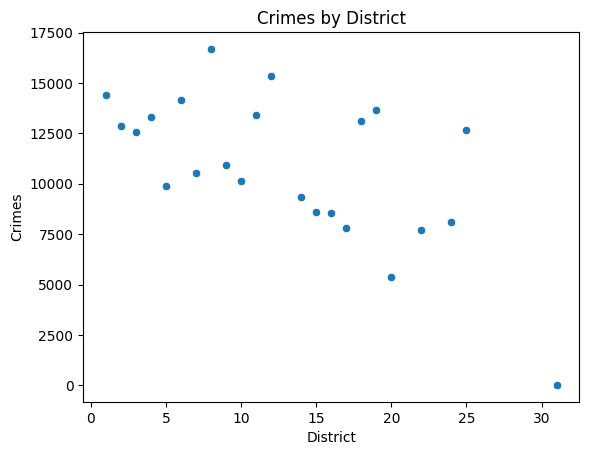

In [175]:
district_counts = crime.groupby('District').size().reset_index(name='Crimes')
sns.scatterplot(data=district_counts, x='District', y='Crimes')
plt.title('Crimes by District')
plt.show()

<h4>INSIGHT : The district with the <b>highest number of crimes</b> recorded has <b>around 17,000 cases</b>, while other districts show counts ranging between <b>5,000 to 15,000</b>. This clearly indicates that crime is <b>not evenly distributed</b>, but rather concentrated in certain areas.<br><br>Some districts experience <b>significantly higher crime rates</b>, possibly due to factors like <b>population density, urban activity, or socio-economic conditions</b>. This suggests that <b>targeted safety measures</b> should be prioritized in high-crime districts to reduce overall incidents.</h4>

<hr>

<h3>27.) Based on the monthly distribution, which month has the highest crime activity?</h3>

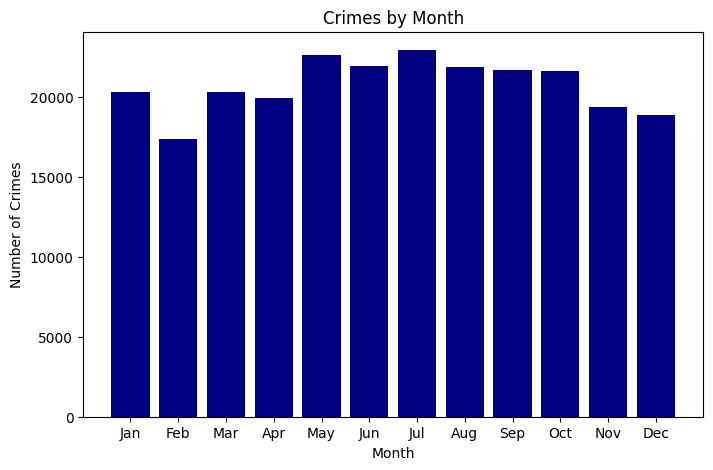

In [177]:
crime['Month'] = crime['Date'].dt.month
month_counts = crime['Month'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(month_counts.index, month_counts.values, color='navy')
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

<h4>INSIGHT : The month with the <b>highest crime activity</b> is <b>July</b>, with reported cases reaching <b>over 22,000</b>. It is followed closely by <b>May and June</b>, which also show high crime counts. In contrast, <b>February and December</b> recorded the <b>lowest numbers</b>, both below <b>19,000 cases</b>.<br><br>This shows that crime tends to <b>peak during mid-year months</b>, when people are usually more active outdoors and in social events, creating more opportunities for incidents. On the other hand, crime is <b>lower during holiday months</b> like December, possibly due to stronger police presence and family-centered activities.</h4>

<hr>

<h3>28.) Looking at the top 10 detailed crime descriptions, what kind of crimes are most specific/common?</h3>

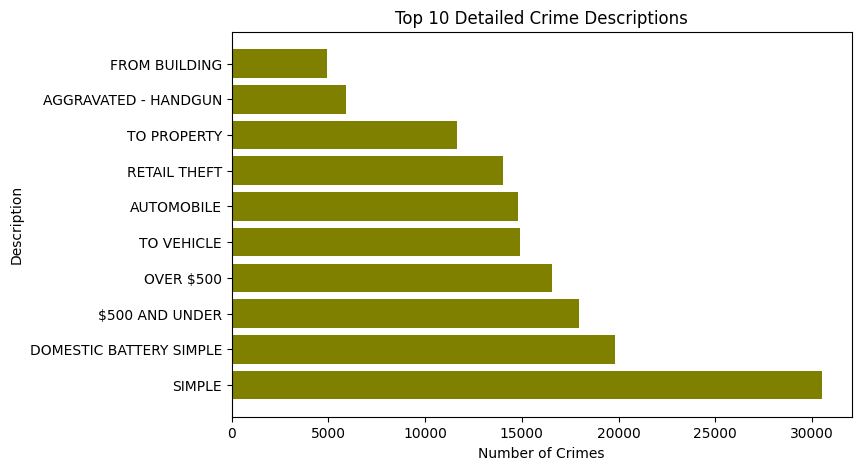

In [178]:
desc_counts = crime['Description'].value_counts().head(10)
plt.figure(figsize=(8,5))
plt.barh(desc_counts.index, desc_counts.values, color='olive')
plt.title("Top 10 Detailed Crime Descriptions")
plt.xlabel("Number of Crimes")
plt.ylabel("Description")
plt.show()

<h4>INSIGHT : The most common detailed crime description is <b>Simple Battery</b>, with <b>over 30,000 cases</b>, making it the highest among the top 10. Other frequent crimes include <b>Domestic Battery (Simple)</b> with around <b>20,000 cases</b>, and <b>Theft Over $500</b>, which also recorded a high number of incidents.<br><br>This shows that crimes involving <b>physical assault and theft</b> are the most specific and commonly reported. These patterns highlight the need for stronger <b>community safety measures</b> and <b>conflict prevention programs</b>, since many of these crimes occur in everyday situations.</h4>

<hr>

<h3>29.) Which FBI crime categories are most frequent? What type of crimes might these represent?</h3>

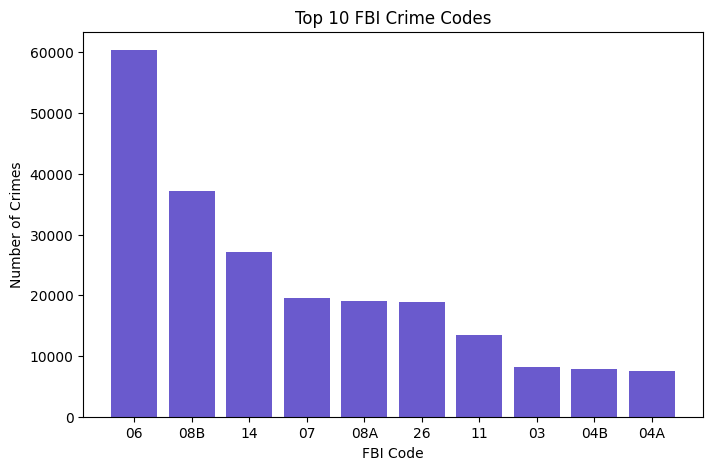

In [179]:
fbi_counts = crime['FBI Code'].value_counts().head(10)
plt.figure(figsize=(8,5))
plt.bar(fbi_counts.index, fbi_counts.values, color='slateblue')
plt.title("Top 10 FBI Crime Codes")
plt.xlabel("FBI Code")
plt.ylabel("Number of Crimes")
plt.show()

<h4>INSIGHT : The most frequent FBI crime category is <b>Code 06</b>, with <b>around 60,000 cases</b>, making it the dominant category among the top 10. This is followed by <b>Code 08B</b> with nearly <b>38,000 cases</b>, and <b>Code 14</b> with about <b>27,000 cases</b>. These three codes clearly account for the majority of crimes recorded.<br><br>These categories usually represent <b>theft, battery, and property-related offenses</b>, which are common in daily life and tend to be reported more often. The high counts suggest that <b>crimes against property and physical assault</b> remain the most pressing issues, highlighting the need for focused law enforcement strategies on these crime types.</h4>

<hr>

<h3>30.) What percentage of crimes are domestic-related compared to non-domestic?</h3>

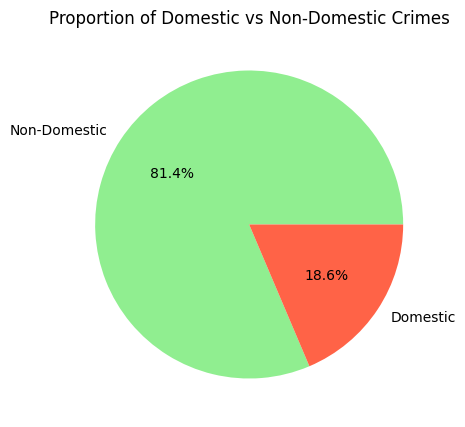

In [180]:
domestic_counts = crime['Domestic'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(domestic_counts.values, labels=['Non-Domestic','Domestic'], autopct='%1.1f%%', colors=['lightgreen','tomato'])
plt.title("Proportion of Domestic vs Non-Domestic Crimes")
plt.show()

<h4>INSIGHT : The majority of crimes are <b>Non-Domestic (81.4%)</b>, while only <b>18.6% are Domestic-related</b>. This indicates that most reported crimes occur <b>outside the household or family setting</b>, such as in public places or communities.<br><br>However, the presence of nearly <b>1 in 5 crimes being Domestic</b> is still significant. It highlights that <b>domestic violence and family-related crimes remain a critical social issue</b>, requiring strong interventions such as <b>community support, awareness campaigns, and protective policies</b> to safeguard vulnerable individuals at home.</h4>

<hr>

<h3>31.) Where are crimes at Bowling Alleys most concentrated, and what might explain this pattern?</h3>

In [221]:
bowling_df = crime[crime['Location Description'] == 'BOWLING ALLEY']

locations = list(zip(bowling_df['Latitude'], bowling_df['Longitude']))
bowling_map = folium.Map(location=[bowling_df['Latitude'].mean(), bowling_df['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(bowling_map)

bowling_map.save('bowling_heatmap.html')
bowling_map

<h4>INSIGHT : Crimes at <b>Bowling Alleys are most concentrated in central Chicago</b>, as shown by the heatmap’s strong clustering in the downtown and nearby urban areas. This pattern can be explained by the <b>higher population density, nightlife activities, and entertainment hubs</b> in the city, which naturally attract more incidents.<br><br>Perhaps, <b>suburban and rural areas show very few cases</b>, suggesting that crime at Bowling Alleys is strongly tied to <b>urban social activity and crowd-related behavior</b>.</h4>

<hr>

<h3>32.) Are crimes at Libraries scattered across the city or concentrated in certain areas?</h3>

In [207]:
library_df = crime[crime['Location Description'] == 'LIBRARY']

locations = list(zip(library_df['Latitude'], library_df['Longitude']))
library_map = folium.Map(location=[library_df['Latitude'].mean(), library_df['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(library_map)

library_map.save('library_heatmap.html')
library_map

<h4>INSIGHT : Crimes at <b>Libraries are not evenly scattered across the city</b>, instead, they are <b>heavily concentrated in central and southern Chicago</b>, as highlighted by the strong clusters on the heatmap. This suggests that <b>urban areas with larger public facilities and higher visitor traffic</b> experience more crime incidents compared to suburban regions.<br><br>The pattern indicates that libraries located in <b>densely populated neighborhoods</b> face greater crime risks, possibly due to <b>higher foot traffic, accessibility, and urban socio-economic factors</b>.</h4>

<hr>

<h3>33.) Do Abandoned Buildings show a hotspot pattern for crime? Why might these areas attract criminal activity?</h3>

In [209]:
abandoned_df = crime[crime['Location Description'] == 'ABANDONED BUILDING']

locations = list(zip(abandoned_df['Latitude'], abandoned_df['Longitude']))
abandoned_map = folium.Map(location=[abandoned_df['Latitude'].mean(), abandoned_df['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(abandoned_map)

abandoned_map.save('abandoned_heatmap.html')
abandoned_map


<h4>INSIGHT : Yes, <b>Abandoned Buildings show clear hotspot patterns for crime</b>, particularly concentrated in the <b>central and southern parts of Chicago</b>. These areas often become <b>targets for illegal activities</b> because they provide <b>low visibility, limited security, and fewer witnesses</b>.<br><br>Such environments make it easier for crimes like <b>drug use, theft, vandalism, and gang-related activity</b> to occur. The pattern highlights the need for <b>urban redevelopment and stricter monitoring of abandoned properties</b> to reduce crime risks.</h4>

<hr>

<h3>34.) Which areas show the highest density of crimes in Parking Lots, and what does this suggest about parking security?</h3>

In [211]:
parking_df = crime[crime['Location Description'] == 'PARKING LOT']

locations = list(zip(parking_df['Latitude'], parking_df['Longitude']))
parking_map = folium.Map(location=[parking_df['Latitude'].mean(), parking_df['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(parking_map)

parking_map.save('parking_heatmap.html')
parking_map


<h4>INSIGHT : The highest-risk areas for parking lot crimes are concentrated in <b>downtown Chicago, the South Side, and nearby urban zones</b>. The heatmap clearly shows red clusters in these locations, indicating a high density of incidents compared to suburban areas where activity is much lighter. This suggests that parking lots in busy commercial and residential districts are more vulnerable due to higher vehicle volume and limited security presence.<br><br>Perhaps, the intense hotspot in the <b>South Side</b> highlights the urgent need for improved safety measures. Installing <b>better lighting, CCTV cameras, and increased patrol visibility</b> can significantly help reduce risks. For drivers, this means being extra cautious when leaving vehicles in these areas, while for authorities, the focus should be on reinforcing parking lot security where incidents occur most frequently.</h4>

<hr>

<h3>35.) Are crimes in Hotels concentrated near business districts or more spread out across neighborhoods?</h3>

In [222]:
hotel_df = crime[crime['Location Description'] == 'HOTEL']

locations = list(zip(hotel_df['Latitude'], hotel_df['Longitude']))
hotel_map = folium.Map(location=[hotel_df['Latitude'].mean(), hotel_df['Longitude'].mean()], zoom_start=17)
HeatMap(locations).add_to(hotel_map)

hotel_map.save('hotel_heatmap.html')
hotel_map


<h4>INSIGHT : The heatmap shows that crimes in <b>hotels are heavily concentrated in the downtown business district</b>, especially around <b>West Grand Avenue</b> and <b>West Ohio Street</b>. This means that hotels located in the busiest parts of the city, where there are many <b>tourists and business travelers</b>, are more at risk compared to hotels in quieter neighborhoods. The strong <b>hotspot</b> in this area suggests that the high flow of people creates both opportunities for visitors and chances for offenders to target them.<br><br>This finding highlights the importance of <b>stronger hotel security</b> in these busy zones. Measures like <b>better access control, visible security staff, and tighter cooperation with local police</b> could help reduce risks. For <b>guests</b>, it’s a reminder to stay <b>extra cautious in crowded hotel areas</b>, while for <b>city authorities</b>, the focus should be on protecting <b>business hubs</b> where hotels play a central role in tourism and local economy.</h4>

<hr>

<h1><b>SUMMITED BY : JUNELLE C. DINGLASAN</b></h1>

<h1><b>BSIT 3B</b></h1>

<hr>